<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SVM---find-weighted-vector" data-toc-modified-id="SVM---find-weighted-vector-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>SVM - find weighted vector</a></span><ul class="toc-item"><li><span><a href="#example" data-toc-modified-id="example-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>example</a></span></li></ul></li><li><span><a href="#PCA" data-toc-modified-id="PCA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#linear-separable-among-possible-function" data-toc-modified-id="linear-separable-among-possible-function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>linear separable among possible function</a></span><ul class="toc-item"><li><span><a href="#XOR" data-toc-modified-id="XOR-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>XOR</a></span></li></ul></li><li><span><a href="#least-square---w0-,-w1" data-toc-modified-id="least-square---w0-,-w1-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>least square - w0 , w1</a></span></li><li><span><a href="#perceptron" data-toc-modified-id="perceptron-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>perceptron</a></span><ul class="toc-item"><li><span><a href="#other" data-toc-modified-id="other-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>other</a></span></li></ul></li><li><span><a href="#k-means" data-toc-modified-id="k-means-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>k means</a></span></li><li><span><a href="#more" data-toc-modified-id="more-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>more</a></span></li></ul></div>

# Machine Learning Basic

This file contains some ML basic learnt from COMP9417

# SVM - find weighted vector 

In [1]:
from sklearn.svm import SVC
import numpy as np

X = np.array([[2,3],[1,4],[4,5],[5,6]] )
y = np.array([-1,-1, 1, 1])
X = np.array([[1,3],[2,1],[0,1]] )
y = np.array([1,1, -1])

clf = SVC( kernel = 'linear')
clf.fit(X, y) 

print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))
print('Number of support vectors for each class = ', clf.n_support_)

w =  [[0.99968 0.49984]]
b =  [-1.49941333]
Indices of support vectors =  [2 0 1]
Support vectors =  [[0. 1.]
 [1. 3.]
 [2. 1.]]
Coefficients of the support vector in the decision function =  [[0.6248  0.24992 0.37488]]
Number of support vectors for each class =  [1 2]


In [2]:
from fractions import Fraction

print('w = ',clf.coef_.round(3))
print('b = ',clf.intercept_.round(3))
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_).round(3))
a, b, c = np.abs(clf.dual_coef_).round(3)[0]
print(Fraction(a), Fraction(b), Fraction(c))

w =  [[1.  0.5]]
b =  [-1.499]
Coefficients of the support vector in the decision function =  [[0.625 0.25  0.375]]
5/8 1/4 3/8


## example

In [3]:
from sklearn.svm import SVC

X = np.array([[-1,1],[1,1],[2,4]] )
y = np.array([-1,1, -1,])

clf = SVC( kernel = 'linear')
clf.fit(X, y) 

print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))
print('Number of support vectors for each class = ', clf.n_support_)

w =  [[ 0.99988 -0.99996]]
b =  [1.]
Indices of support vectors =  [0 2 1]
Support vectors =  [[-1.  1.]
 [ 2.  4.]
 [ 1.  1.]]
Coefficients of the support vector in the decision function =  [[0.6666  0.33332 0.99992]]
Number of support vectors for each class =  [2 1]


In [4]:
from fractions import Fraction

print('w = ',clf.coef_.round(3))
print('b = ',clf.intercept_.round(3))
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_).round(3))
a, b, c = np.abs(clf.dual_coef_).round(3)[0]
print(Fraction(a), Fraction(b), Fraction(c))

w =  [[ 1. -1.]]
b =  [1.]
Coefficients of the support vector in the decision function =  [[0.667 0.333 1.   ]]
3003900951456121/4503599627370496 5998794703657501/18014398509481984 1


# PCA

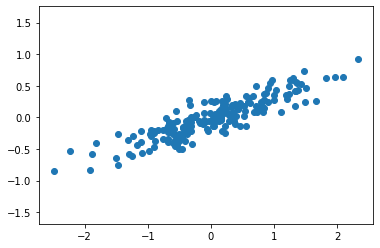

In [5]:
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
A=rng.rand(2, 2)
B=rng.randn(2, 200)
X = np.dot(A,B).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
tmp = 0 # to filter graph output

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [7]:
print(pca.components_)
print()
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]

[0.7625315 0.0184779]


length:  0.7625315008826112 vector: [-0.94446029 -0.32862557]
length:  0.018477895513562565 vector: [-0.32862557  0.94446029]


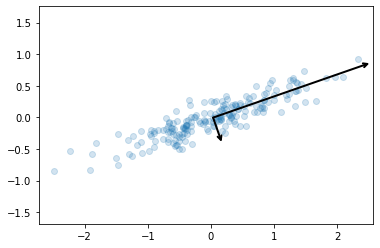

In [8]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    print("length: ", length,"vector:", vector)
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ - v)
plt.axis('equal')
tmp = 2

# linear separable among possible function

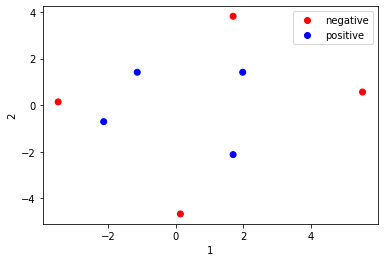

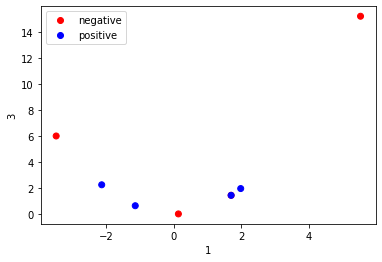

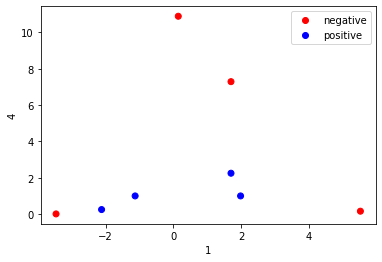

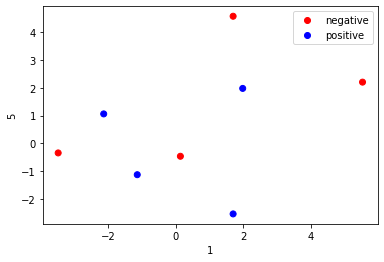

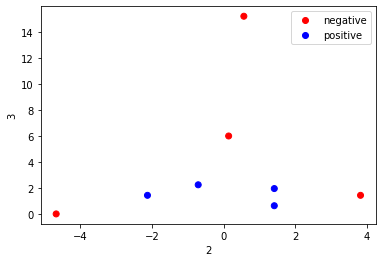

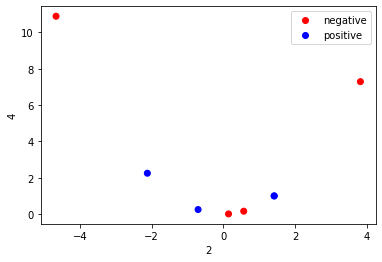

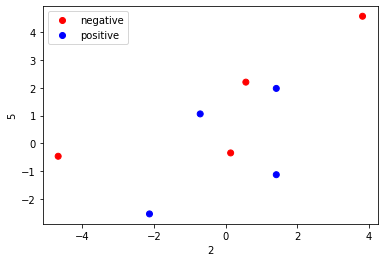

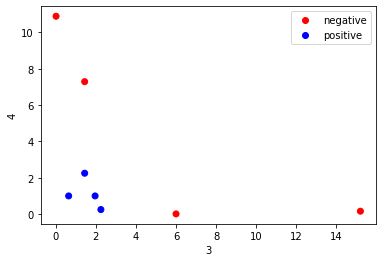

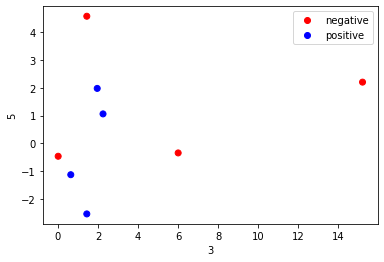

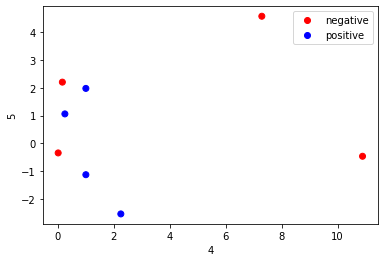

In [9]:
import itertools
import itertools
import math
import numpy as py
from matplotlib.colors import ListedColormap


x1 = np.array([-0.8, 3.9, 1.4, 0.1, 1.2, -2.45, -1.5, 1.2]).T
x2 = np.array([1, 0.4, 1, -3.3, 2.7, 0.1, -0.5, -1.5]).T
y = np.array([1,-1,1,-1,-1,-1,1,1])

colours = ListedColormap(['r','b'])

t1 = math.sqrt(2)*x1
t2 = math.sqrt(2)*x2
t3 = x1**2
t4 = x2**2
t5 = math.sqrt(2)*x1*x2

# where the idx are the feasible solution e.g. t3 and t4 in here
ls = [(t1,1), (t2,2), (t3,3), (t4,4), (t5,5)]

for c in itertools.combinations(ls, 2):
    x1_trans = c[0][0]
    x2_trans = c[1][0]
    idx1 = c[0][1]
    idx2 = c[1][1]
    scatterplot = plt.scatter(x1_trans, x2_trans, c=y, cmap=colours) # 2d - 2 features
    plt.xlabel(f"{idx1}")
    plt.ylabel(f"{idx2}")
    classes = ['negative', 'positive']
    plt.legend(handles=scatterplot.legend_elements()[0], labels=classes)
    plt.show()

## XOR

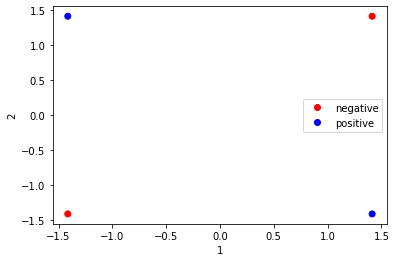

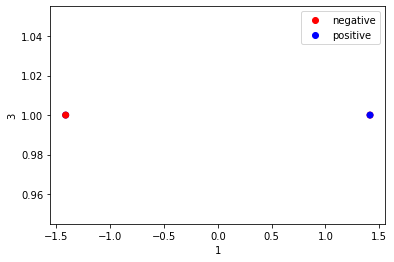

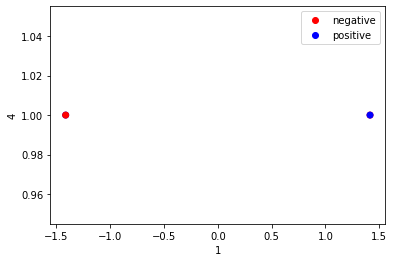

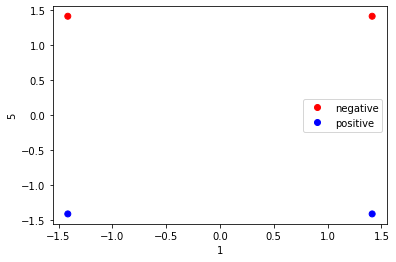

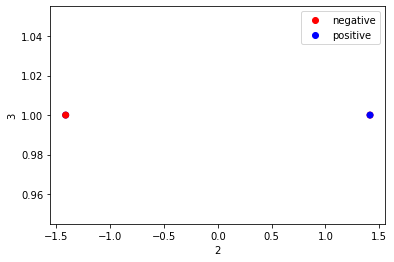

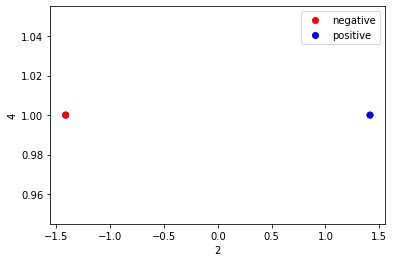

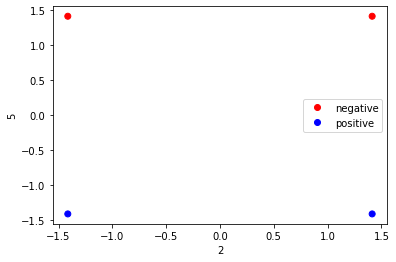

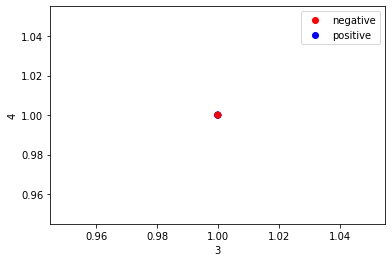

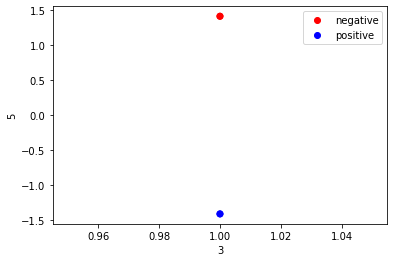

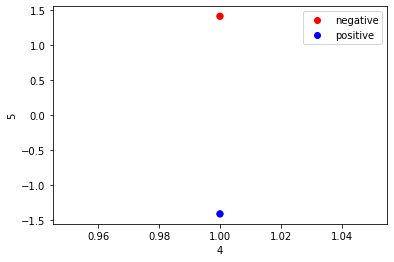

In [10]:
import itertools
import itertools
import math
import numpy as py
from matplotlib.colors import ListedColormap


x1 = np.array([1,-1,1,-1]).T
x2 = np.array([1,1,-1,-1]).T
y = np.array([-1,1,1,-1])

colours = ListedColormap(['r','b'])

t1 = math.sqrt(2)*x1
t2 = math.sqrt(2)*x2
t3 = x1**2
t4 = x2**2
t5 = math.sqrt(2)*x1*x2

# where the idx are the feasible solution e.g. t3 and t4 in here
ls = [(t1,1), (t2,2), (t3,3), (t4,4), (t5,5)]

for c in itertools.combinations(ls, 2):
    x1_trans = c[0][0]
    x2_trans = c[1][0]
    idx1 = c[0][1]
    idx2 = c[1][1]
    scatterplot = plt.scatter(x1_trans, x2_trans, c=y, cmap=colours) # 2d - 2 features
    plt.xlabel(f"{idx1}")
    plt.ylabel(f"{idx2}")
    classes = ['negative', 'positive']
    plt.legend(handles=scatterplot.legend_elements()[0], labels=classes)
    plt.show()

# least square - w0 , w1

In [11]:
x = np.array([4,6,12,25,29,46,59])
y = np.array([2,4,10,23,28,44,60])
cov_ = np.cov(x,y)[0][1]
var_ = np.var(x)
#w1 = cov_ / var_
#w1
xy_bar = sum(x*y)/len(x)
x_bar_y_bar = x.mean() * y.mean()
tmp = x * x
x_squared_bar = sum(tmp)/len(tmp)
x_mean = x.mean()**2
w1 = (xy_bar - x_bar_y_bar) / (x_squared_bar - x_mean)
print("w1:", w1)
w0 = y.mean() - w1 * x.mean()
print("w0:", w0)

w1: 1.03977398626191
w0: -2.457013073343674


In [12]:
x_test = 50
y_pred = w0 + w1 * x_test
print(y_pred)

49.53168623975183


# perceptron

In [13]:
x1 = np.array([-2, 2, 1 ,-1, 3])
x2 = np.array([-1, -1, 1, -1, 2])
x_original = np.array([x1,x2]).T

X = x_original
y = np.array([-1, 1, 1, -1, 1]).reshape(-1, 1)

X = np.concatenate((np.ones((X.shape[0],1)), X),axis=1) # add bias term

def train_perceptron(X, y, w, eta=0.4):
    
    iter_ = 0
    counter = 0
    rows = X.shape[0]
    w_updated = []
    print("iteration No. w0       w1      w2")
    print(f"     0         ", [1.0, 1.0, 1.0]) # for some reason , my list append does not work...can only print on the fly
    update_count = 1
    count = 1
    while True:
        for i in range(rows):
            iter_ += 1
            if y[i] * (w.T @ X[i]) < 0: # mistake and update w
                
                w += eta * y[i] * X[i]
                w_updated.append(w)
                print(f"     {count}       ", [round(i, 2) for i in w])
                counter = 0
                update_count += 1
                
            counter += 1
            
            if counter > rows:
                print()
                print(f"converge after {iter_-1} iterations")
                return w_updated, w_updated[-1]
            count += 1

w = np.array([5,1,1], dtype=np.float) # for computation
_, res = train_perceptron(X, y, w)

iteration No. w0       w1      w2
     0          [1.0, 1.0, 1.0]
     1        [4.6, 1.8, 1.4]
     4        [4.2, 2.2, 1.8]
     9        [3.8, 2.6, 2.2]

converge after 13 iterations


In [14]:
w0, w1, w2 = res
x_test = (-5, 3)
y_pred = w0 + w1 * x_test[0] + w2 * x_test[1]
print(y_pred)
if y_pred <0:
    print("class", -1)

-2.6000000000000014
class -1


## other

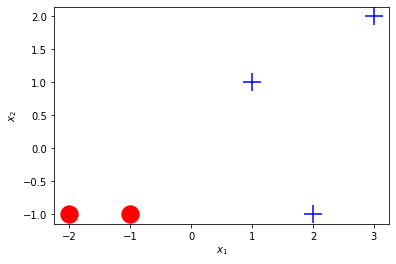

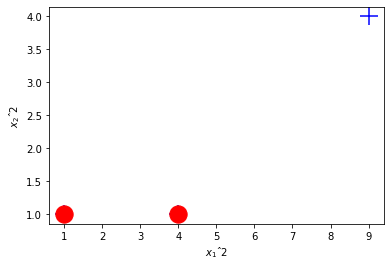

ValueError: could not broadcast input array from shape (3) into shape (4)

In [15]:
x1 = np.array([-2, 2, 1 ,-1, 3])
x2 = np.array([-1, -1, 1, -1, 2])
x_original = np.array([x1,x2]).T

x1_transform = np.power(x1, 2)
x2_transform = np.power(x2, 2)

X = np.array([x1_transform,x2_transform]).T
y = np.array([-1, 1, 1, -1, 1]).reshape(-1, 1)



import numpy as np
import matplotlib.pyplot as plt
# data
X = np.array([
    [-2, -1],[2, -1], [1,1],[-1,-1],[3,2]
])
n_input = 5
y = np.array([-1, 1, 1, -1, 1])
plt.scatter(X[:,0][y==1], X[:,1][y==1], color="blue", marker="+", s=300)
plt.scatter(X[:,0][y==-1], X[:,1][y==-1], color="red", marker="o", s=300)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.show()
# transform X
def phi(x):
    return(np.array([x[0]**2, x[1]**2, np.sqrt(2)*x[0]*x[1]]))

phiX = np.apply_along_axis(phi, 1, X)
plt.scatter(phiX[:,0][y==1], phiX[:,1][y==1], color="blue", marker="+", s=300)
plt.scatter(phiX[:,0][y==-1], phiX[:,1][y==-1], color="red", marker="o", s=300)
plt.xlabel("$x_1ˆ2$")
plt.ylabel("$x_2ˆ2$")

plt.show()
# initialise perceptron
w = np.zeros(shape=(100, 4))
w = np.concatenate((np.arange(100).reshape(-1,1), w), axis=1)
w[0,1:] = np.array([5,1,1])



# add bias to feature vecs
phiX = np.concatenate((np.ones(n_input).reshape(-1,1), phiX), axis=1)
idx = 0
ctr = 10
eta = 0.4
conv = 0 # keep track of convergence
iteration_no = 0
while ctr:
    for i in range(X.shape[0]):
        iteration_no += 1
        conv+=1
        if (y[i] * w[idx, 1:] @ phiX[i] < 0):
            conv=0 # reset convergence counter
            w[idx+1, 0] = iteration_no
            w[idx+1, 1:] = w[idx, 1:] + y[i] * phiX[i] * eta
            idx +=1
    if conv>=8: # TODO
        wstar = w[idx,1:]
        break
    ctr -= 1
# check correct
for i in range(n_input):
    print(y[i] * phiX[i] @ wstar)
w[:idx+1]
#np.savetxt("perceptron.csv", w[:idx+1], delimiter=’,’)

# k means

In [ ]:
c = (3.33, 6.67)
xs = [2.01, 3.49, 4.58, 4.91, 4.99, 5.01, 5.32, 5.78, 5.99, 6.21, 7.26, 8.00]
c1 = []
c2 = []
for x in xs:
    dist1 = abs(c[0] - x)
    dist2 = abs(c[1] - x)
    if dist1 > dist2:
        c2.append(x)
    else:
        c1.append(x)
print(c1)
print(c2)
print(sum(c1) / len(c1))
print(sum(c2) / len(c2))
new1 = sum(c1) / len(c1)
new2 = sum(c2) / len(c2)

[2.01, 3.49, 4.58, 4.91, 4.99]
[5.01, 5.32, 5.78, 5.99, 6.21, 7.26, 8.0]
3.996
6.224285714285714


In [ ]:
c = (new1, new2)
xs = [2.01, 3.49, 4.58, 4.91, 4.99, 5.01, 5.32, 5.78, 5.99, 6.21, 7.26, 8.00]
c1 = []
c2 = []
for x in xs:
    dist1 = abs(c[0] - x)
    dist2 = abs(c[1] - x)
    if dist1 > dist2:
        c2.append(x)
    else:
        c1.append(x)
print(c1)
print(c2)
print(sum(c1) / len(c1))
print(sum(c2) / len(c2))
new1 = sum(c1) / len(c1)
new2 = sum(c2) / len(c2)

[2.01, 3.49, 4.58, 4.91, 4.99, 5.01]
[5.32, 5.78, 5.99, 6.21, 7.26, 8.0]
4.165
6.426666666666667


# more

In [ ]:
steps = 9
weight_vector = np.asarray([1,1,1,1]).reshape(4,1)
iterations = 400
alphas = [0.1]
#alphas = [0.5, 1, 2, 1, 0.5, 0.25, 0.1, 0.05, 0.01]
losses = []
c = 2
w0_vector = np.ones((train_x.shape[0], 1))
train_x = np.hstack((train_x[:,:0], w0_vector,train_x[:,0:])) # insert 1s at 0 position
test_x = np.hstack((test_x[:,:0], w0_vector,test_x[:,0:]))
#np.hstack((x[:,:i], col, x[:,i:]))
# print(train_x[0])


'''
@param n: number of observation
'''
def loss(X, y, weight_vector):
    c = 2 # np.asscalar(np.array([2]))
    n = len(y)# np.asscalar(np.array([len(y)]))
    y_preds = X.dot(weight_vector)
    l = (1/n)*np.sum(np.sqrt(np.power(1/c,2) * np.power((y_preds - y), 2) + 1) - 1)
    #print("loss shape", l.shape)
    return l
    
#     for i in range(n):
#         loss_sum += math.sqrt(1/c**2 * (y[i] - y_pred[i])**2 + 1) - 1
    # return loss_sum / n
    import warnings

def gradient_descent(X, y, weight_vector, learning_rate, niter):
    '''
    X - matrix of training set
    y - vector of Y - shape = (204,)
    return the losses (shape=(204,)) and weights (shape=(204,4))
    '''
    warnings.filterwarnings("ignore", category=RuntimeWarning) # where the matrix is too large when alpha >= 2 
    
    n = len(y)
    losses = np.zeros(niter)
    n_weight = len(weight_vector)
    weight_record = np.zeros((niter, n_weight))
    y = y.reshape(-1, 1) # convert to same shape as y_preds which is (204,1) instead of (204,)...
    
    for i in range(niter):
        
        preds = np.dot(X, weight_vector)
        diff = preds - y
        denominator = 2 * np.sqrt(np.power(diff, 2) + 4)
        dldw = X.T.dot( diff / denominator )
        
        weight_vector = weight_vector - (1/n)*learning_rate*dldw
        weight_record[i, :] = weight_vector.T
        losses[i] = loss(X, y, weight_vector)
    
    return losses, weight_record

In [ ]:
for lr in alphas:
    
    l, _ = gradient_descent(train_x, train_y, weight_vector, lr, iterations)
    losses.append(l)

    
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,3, figsize=(10,10))
nIter = 40
for i, ax in enumerate(ax.flat):
    # losses is a list of 9 elements. Each element is an array of length nIter storing the loss at each iteration for
    # that particular step size
    ax.plot(losses[i])
    ax.set_title(f"step size: {alphas[i]}") # plot titles
    
plt.tight_layout() # plot formatting
plt.show()